<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

## Изучение данных из файла

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10) #посмотрим на таблицу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.duplicated().sum() 
# явных дубликатов нет, это хорошо, посмотрим, чтобудет дальше.

0

### Вывод

- пропусков очень много
- по столбцам явно выделяется  cityCenters_nearest буду переименовывать
- есть квартира за чумовые 763000000 и волшебные 12190 - явные выбросы
- много данных во float64 (например, кол-во прудов) нужно перевести в int

## Предобработка данных

Начнем с простенького, переименуем парочку столбцов и расположим их в более логичном порядке


In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
data.set_axis(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'], axis = 'columns', inplace = True)

In [10]:
#проверим переиновались ли
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
#хочу поменять стобцы местами, чтобы было удобнее смотреть данные,а не метаться 
data = data[['locality_name', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'balcony', 'ceiling_height', 'floor', 'floors_total',  'studio', 'is_apartment', 'open_plan', 'last_price', 'total_images', 'airports_nearest', 'city_centers_nearest', 'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'first_day_exposition', 'days_exposition']]

In [12]:
#посмотрим стало ли удобнее
data.head()

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,last_price,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,days_exposition
0,Санкт-Петербург,108.0,51.0,25.0,3,NaN,2.70,8,16.0,False,...,13000000.0,20,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN
1,посёлок Шушары,40.4,18.6,11.0,1,2.0,NaN,1,11.0,False,...,3350000.0,7,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0
2,Санкт-Петербург,56.0,34.3,8.3,2,0.0,NaN,4,5.0,False,...,5196000.0,10,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0
3,Санкт-Петербург,159.0,NaN,NaN,3,0.0,NaN,9,14.0,False,...,64900000.0,0,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0
4,Санкт-Петербург,100.0,32.0,41.0,2,NaN,3.03,13,14.0,False,...,10000000.0,2,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0


Теперь смотреть таблицу удобнее.
Далее поработаем с пропусками.

In [13]:
data.isna().sum().sort_values()

total_area                  0
rooms                       0
total_images                0
last_price                  0
floor                       0
studio                      0
first_day_exposition        0
open_plan                   0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
parks_around_3km         5518
ponds_around_3km         5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [14]:
#Хочу посмотреть в процентах
data.isna().sum().sort_values() / data.shape[0] * 100

total_area               0.000000
rooms                    0.000000
total_images             0.000000
last_price               0.000000
floor                    0.000000
studio                   0.000000
first_day_exposition     0.000000
open_plan                0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
parks_around_3km        23.283683
ponds_around_3km        23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

In [15]:
#Начнем по порядку. В названиях населенного пункта пропущено всего 49 значений, всего 0.20%. Этими строками можно пренебречь. 
data = data.dropna(subset = ['locality_name'])

In [16]:
data['locality_name'].isna().sum()

0

In [17]:
#Теперь подробнее поработам с locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
#значений очень много, приведем все названия к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [19]:
#уберем все лишнее, оставим только названия
data['locality_name_new'] = data['locality_name']
for local in ['поселок', 'деревня', 'посёлок', 'городской', 'коттеджный']:
    data['locality_name_new'] = data['locality_name_new'].str.replace(local, '')

data[['locality_name', 'locality_name_new']].drop_duplicates()

,locality_name,locality_name_new
0,санкт-петербург,санкт-петербург
1,посёлок шушары,шушары
5,городской посёлок янино-1,янино-1
6,посёлок парголово,парголово
8,посёлок мурино,мурино
...,...,...
22938,деревня нижняя,нижняя
23048,коттеджный посёлок лесное,лесное
23354,деревня тихковицы,тихковицы
23411,деревня борисова грива,борисова грива


Отлично, строки с пропусками в населенных пунктах удалили.
Далее разберемся с этажами.

In [20]:
#пропущено всего 86 значений, можно было бы заменить медианой, но может возникнуть ситуация, 
# что квартира выше, чем сам дом, поэтому заменим значением из столбца floor
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']

In [21]:
#проверим 
data['floors_total'].isna().sum()

0

In [22]:
# в living_area  заполним медианой сгруппировкой по кол-ву комнат rooms
print('Пропуски до:', data['living_area'].isna().sum())

for room in data['rooms'].unique():
    median = data.loc[data['rooms'] ==  room, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = median

print('Пропуски после:', data['living_area'].isna().sum())

Пропуски до: 1898
Пропуски после: 0


In [23]:
# заполним пропуски в kitchen_area медианным значением с группировкой по rooms
print('Пропуски до:', data['kitchen_area'].isna().sum())

for room in data['rooms'].unique():
    median = data.loc[data['rooms'] ==  room, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == room), 'kitchen_area'] = median

print('Пропуски после:', data['kitchen_area'].isna().sum())

Пропуски до: 2269
Пропуски после: 197


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [24]:
# остались еще 197 пропусков,надо посмотреть почему
data.loc[data['kitchen_area'].isna()]

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,days_exposition,locality_name_new
144,посёлок мурино,27.00,15.50,NaN,0,2.0,NaN,2,24.0,True,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-30T00:00:00,181.0,мурино
349,деревня кудрово,25.00,17.00,NaN,0,0.0,NaN,1,14.0,False,...,4,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-27T00:00:00,45.0,кудрово
440,санкт-петербург,27.11,24.75,NaN,0,2.0,NaN,4,17.0,True,...,8,38171.0,15015.0,0.0,NaN,2.0,982.0,2018-03-12T00:00:00,64.0,санкт-петербург
508,посёлок парголово,34.40,24.30,NaN,0,1.0,NaN,19,26.0,False,...,0,53115.0,19292.0,0.0,NaN,1.0,593.0,2017-03-28T00:00:00,430.0,парголово
608,посёлок шушары,25.00,18.00,NaN,0,NaN,NaN,7,10.0,True,...,2,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-20T00:00:00,29.0,шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,санкт-петербург,26.00,18.00,NaN,0,0.0,NaN,16,25.0,True,...,7,11405.0,13222.0,0.0,NaN,1.0,623.0,2017-09-01T00:00:00,14.0,санкт-петербург
23442,посёлок мурино,27.70,18.00,NaN,0,2.0,NaN,4,24.0,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-28T00:00:00,4.0,мурино
23554,санкт-петербург,26.00,18.00,NaN,0,NaN,NaN,8,19.0,True,...,15,18090.0,17092.0,0.0,NaN,2.0,112.0,2018-09-07T00:00:00,31.0,санкт-петербург
23592,никольское,29.00,18.00,NaN,0,2.0,NaN,8,9.0,False,...,10,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11T00:00:00,82.0,никольское


In [25]:
#беглый осмор показывает,что не заполнились строки, где 'rooms' имеют 0. Заменим эти пропуски просто медианным значением
print('Пропуски до:', data['kitchen_area'].isna().sum())
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()
print('Пропуски после:', data['kitchen_area'].isna().sum())

Пропуски до: 197
Пропуски после: 0


In [26]:
#посмотрим, что осталось по пропускам
data.isna().sum().sort_values()

locality_name               0
first_day_exposition        0
total_images                0
last_price                  0
studio                      0
floors_total                0
floor                       0
open_plan                   0
rooms                       0
kitchen_area                0
living_area                 0
total_area                  0
locality_name_new           0
days_exposition          3180
parks_around_3km         5510
ponds_around_3km         5510
city_centers_nearest     5511
airports_nearest         5534
ceiling_height           9160
balcony                 11513
ponds_nearest           14565
parks_nearest           15586
is_apartment            20890
dtype: int64

In [27]:
#посмотрим теперь balcony, предположу, что такое большое кол-во пропусков связано с тем, 
#что если балкона нет, то этот пункт пропускали. заменим пропуски на 0 

print('Пропуски до:', data['balcony'].isna().sum())
data.loc[data['balcony'].isna(), 'balcony'] = 0
print('Пропуски после:', data['balcony'].isna().sum())

Пропуски до: 11513
Пропуски после: 0


In [28]:
#тоже самое сделаем с is_apartment, только вместо пропусков вставляем False
print('Пропуски до:', data['is_apartment'].isna().sum())
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
print('Пропуски после:', data['is_apartment'].isna().sum())

Пропуски до: 20890
Пропуски после: 0


In [29]:
# пропуски в ceiling_height заменим медианным значением по всему столбцу, 
# все-таки дома строят по стандартам, сильного разбега в высоте быть не должно
print('Пропуски до:', data['ceiling_height'].isna().sum())
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
print('Пропуски после:', data['ceiling_height'].isna().sum())


Пропуски до: 9160
Пропуски после: 0


In [30]:
#посмотрим, что осталось по пропускам
data.isna().sum().sort_values()

locality_name               0
first_day_exposition        0
total_images                0
last_price                  0
is_apartment                0
studio                      0
floors_total                0
open_plan                   0
ceiling_height              0
balcony                     0
rooms                       0
kitchen_area                0
living_area                 0
total_area                  0
floor                       0
locality_name_new           0
days_exposition          3180
parks_around_3km         5510
ponds_around_3km         5510
city_centers_nearest     5511
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15586
dtype: int64

In [31]:
# пропуски в city_centers_nearest заполним медианой с группировкой по населенному пункту

print('Пропуски до:', data['city_centers_nearest'].isna().sum())

for locality in data['locality_name_new'].unique():
    median = data.loc[data['locality_name_new'] == locality, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name_new'] == locality), 'city_centers_nearest'] = median
print('Пропуски после:', data['city_centers_nearest'].isna().sum())

Пропуски до: 5511
Пропуски после: 4863


In [32]:
# тру-ту-ту... заменилось только около 500 значений, видимо для большинсва населенных пунктов там куча пропусков, остается заменить общей медианой.

print('Пропуски до:', data['city_centers_nearest'].isna().sum())
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()
print('Пропуски после:', data['city_centers_nearest'].isna().sum())


Пропуски до: 4863
Пропуски после: 0


In [33]:
# С парками, водоемами и аэропортом поступим так же
print('Пропуски до:', data['parks_around_3km'].isna().sum())

for locality in data['locality_name_new'].unique():
    median = data.loc[data['locality_name_new'] == locality, 'parks_around_3km'].median()
    data.loc[(data['parks_around_3km'].isna()) & (data['locality_name_new'] == locality), 'parks_around_3km'] = median
print('Пропуски после:', data['parks_around_3km'].isna().sum())

data.loc[data['parks_around_3km'].isna(), 'parks_around_3km'] = data['parks_around_3km'].median()
print('Пропуски после2:', data['parks_around_3km'].isna().sum())

Пропуски до: 5510
Пропуски после: 4863
Пропуски после2: 0


In [34]:
#parks_nearest
print('Пропуски до:', data['parks_nearest'].isna().sum())

for locality in data['locality_name_new'].unique():
    median = data.loc[data['locality_name_new'] == locality, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name_new'] == locality), 'parks_nearest'] = median
print('Пропуски после:', data['parks_nearest'].isna().sum())

data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
print('Пропуски после2:', data['parks_nearest'].isna().sum())

Пропуски до: 15586
Пропуски после: 5998
Пропуски после2: 0


In [35]:
# ponds_around_3km
print('Пропуски до:', data['ponds_around_3km'].isna().sum())

for locality in data['locality_name_new'].unique():
    median = data.loc[data['locality_name_new'] == locality, 'ponds_around_3km'].median()
    data.loc[(data['ponds_around_3km'].isna()) & (data['locality_name_new'] == locality), 'ponds_around_3km'] = median
print('Пропуски после:', data['ponds_around_3km'].isna().sum())

data.loc[data['ponds_around_3km'].isna(), 'ponds_around_3km'] = data['ponds_around_3km'].median()
print('Пропуски после2:', data['ponds_around_3km'].isna().sum())

Пропуски до: 5510
Пропуски после: 4863
Пропуски после2: 0


In [36]:
# ponds_nearest
print('Пропуски до:', data['ponds_nearest'].isna().sum())

for locality in data['locality_name_new'].unique():
    median = data.loc[data['locality_name_new'] == locality, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name_new'] == locality), 'ponds_nearest'] = median
print('Пропуски после:', data['ponds_nearest'].isna().sum())

data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()
print('Пропуски после2:', data['ponds_nearest'].isna().sum())

Пропуски до: 14565
Пропуски после: 4972
Пропуски после2: 0


In [37]:
# airports_nearest
print('Пропуски до:', data['airports_nearest'].isna().sum())

for locality in data['locality_name_new'].unique():
    median = data.loc[data['locality_name_new'] == locality, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name_new'] == locality), 'airports_nearest'] = median
print('Пропуски после:', data['airports_nearest'].isna().sum())

data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
print('Пропуски после2:', data['airports_nearest'].isna().sum())

Пропуски до: 5534
Пропуски после: 4863
Пропуски после2: 0


In [38]:
#посмотрим, что осталось по пропускам
data.isna().sum().sort_values()

locality_name              0
first_day_exposition       0
ponds_nearest              0
ponds_around_3km           0
parks_nearest              0
parks_around_3km           0
city_centers_nearest       0
airports_nearest           0
total_images               0
last_price                 0
open_plan                  0
studio                     0
floors_total               0
floor                      0
ceiling_height             0
balcony                    0
rooms                      0
kitchen_area               0
living_area                0
total_area                 0
is_apartment               0
locality_name_new          0
days_exposition         3180
dtype: int64

Остались только пропуски в days_exposition - кол-ве дней с момента создания объявления до закрытия. Этот показатель заполняется автоматически, пропуски в нем - результат технической ошибки, либо эти объявления еще не закрыты. Пока оставлю их как есть.


Теперь изменение типов данных. В столбцах balcony, floors_total, airports_nearest, city_centers_nearest, parks_around_3km, parks_nearest, ponds_around_3km, ponds_nearest значения float64, переведем их в int64. Логика простая - не может быть 1,5 балкона, 7,8 этажей, в столбцах с растояниями значения указаны в метрах, сантиметры нам тут не нужны, поэтому переводим в цельночисленные.

In [39]:
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int)
data['city_centers_nearest'] = data['city_centers_nearest'].astype(int)
data['parks_around_3km'] = data['parks_around_3km'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_around_3km'] = data['ponds_around_3km'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)

In [40]:
#проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
locality_name           23650 non-null object
total_area              23650 non-null float64
living_area             23650 non-null float64
kitchen_area            23650 non-null float64
rooms                   23650 non-null int64
balcony                 23650 non-null int64
ceiling_height          23650 non-null float64
floor                   23650 non-null int64
floors_total            23650 non-null int64
studio                  23650 non-null bool
is_apartment            23650 non-null bool
open_plan               23650 non-null bool
last_price              23650 non-null float64
total_images            23650 non-null int64
airports_nearest        23650 non-null int64
city_centers_nearest    23650 non-null int64
parks_around_3km        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around_3km        23650 non-null int64
ponds_nearest           2365

In [41]:
# first_day_exposition приведем в вид только даты, часы нам не нужны и там только 00:00
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [42]:
# проверим
data.head()

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,total_images,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,first_day_exposition,days_exposition,locality_name_new
0,санкт-петербург,108.0,51.0,25.0,3,0,2.70,8,16,False,...,20,18863,16028,1,482,2,755,2019-03-07,NaN,санкт-петербург
1,посёлок шушары,40.4,18.6,11.0,1,2,2.65,1,11,False,...,7,12817,18603,0,460,0,584,2018-12-04,81.0,шушары
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5,False,...,10,21741,13933,1,90,2,574,2015-08-20,558.0,санкт-петербург
3,санкт-петербург,159.0,45.0,9.5,3,0,2.65,9,14,False,...,0,28098,6800,2,84,3,234,2015-07-24,424.0,санкт-петербург
4,санкт-петербург,100.0,32.0,41.0,2,0,3.03,13,14,False,...,2,31856,8098,2,112,1,48,2018-06-19,121.0,санкт-петербург


## Расчёты и добавление результатов в таблицу

In [43]:
#добавим цену квадратного метра
data['price_m2'] = data['last_price'] / data['total_area']
data['price_m2'] = data['price_m2'].round(2)

In [44]:
#добавим отдельные столбцы для дня недели, месяца и года
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday

In [45]:
# добавим категоризацию по этажам
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1) 

In [46]:
# теперь добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [47]:
# проверим стодбцы
data.head()

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,first_day_exposition,days_exposition,locality_name_new,price_m2,year,month,weekday,floor_category,living_area_ratio,kitchen_area_ratio
0,санкт-петербург,108.0,51.0,25.0,3,0,2.70,8,16,False,...,2019-03-07,NaN,санкт-петербург,120370.37,2019,3,3,другой,0.472222,0.231481
1,посёлок шушары,40.4,18.6,11.0,1,2,2.65,1,11,False,...,2018-12-04,81.0,шушары,82920.79,2018,12,1,первый,0.460396,0.272277
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5,False,...,2015-08-20,558.0,санкт-петербург,92785.71,2015,8,3,другой,0.612500,0.148214
3,санкт-петербург,159.0,45.0,9.5,3,0,2.65,9,14,False,...,2015-07-24,424.0,санкт-петербург,408176.10,2015,7,4,другой,0.283019,0.059748
4,санкт-петербург,100.0,32.0,41.0,2,0,3.03,13,14,False,...,2018-06-19,121.0,санкт-петербург,100000.00,2018,6,1,другой,0.320000,0.410000


## Исследовательский анализ данных

In [48]:
import matplotlib.pyplot as plt

In [49]:
%config InlineBackend.figure_format = 'retina'

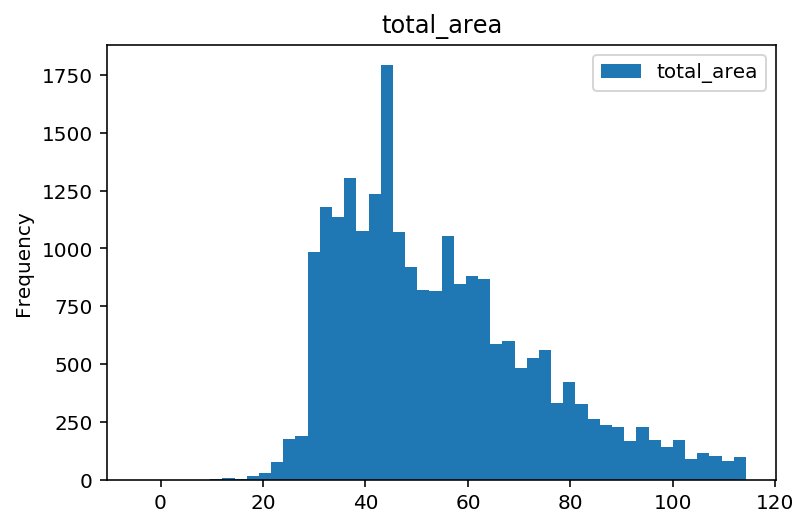

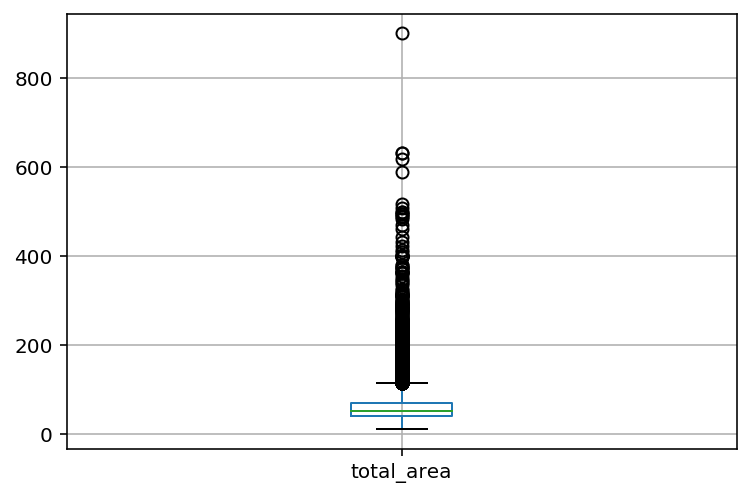

q1 - 1.5 * iqr = -4.6
q3 + 1.5 * iqr = 114.2

count    23650.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64


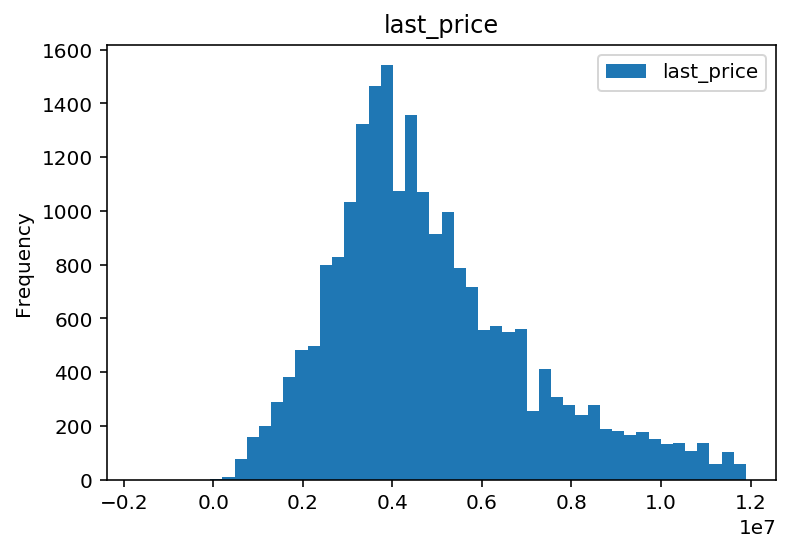

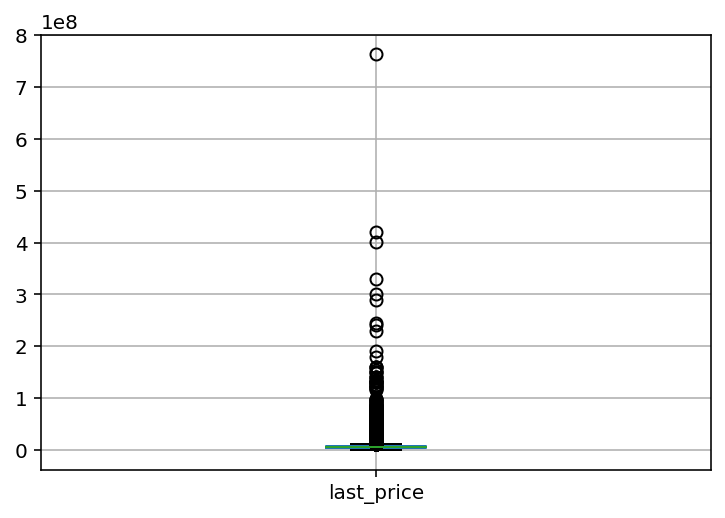

q1 - 1.5 * iqr = -1698500.0
q3 + 1.5 * iqr = 11897500.0

count        23650.0
mean       6541126.9
std       10896399.2
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64


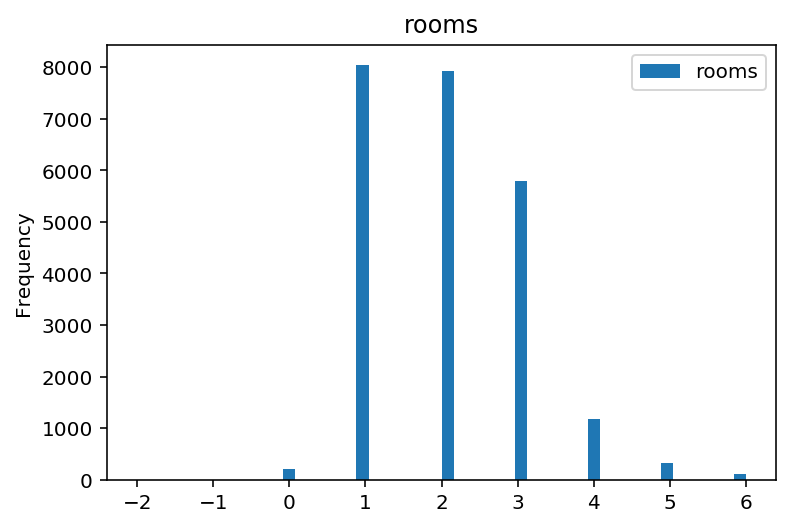

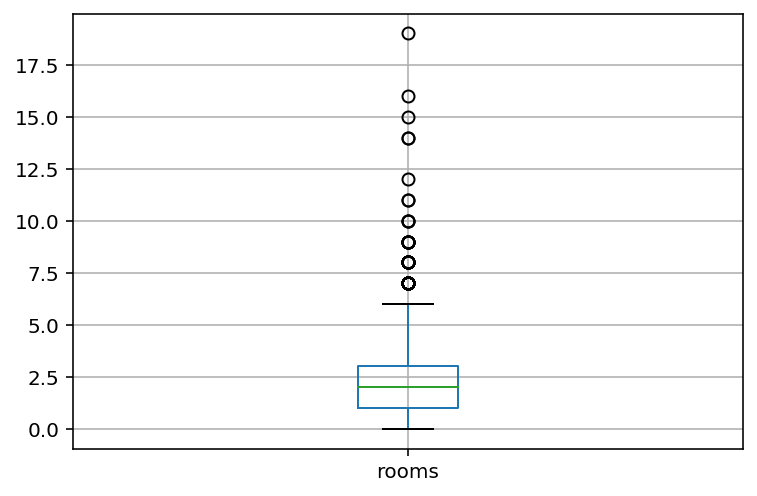

q1 - 1.5 * iqr = -2.0
q3 + 1.5 * iqr = 6.0

count    23650.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64


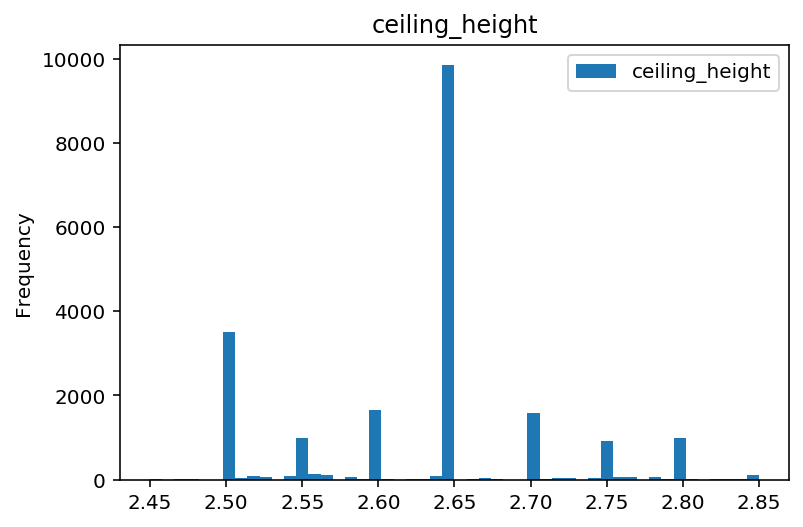

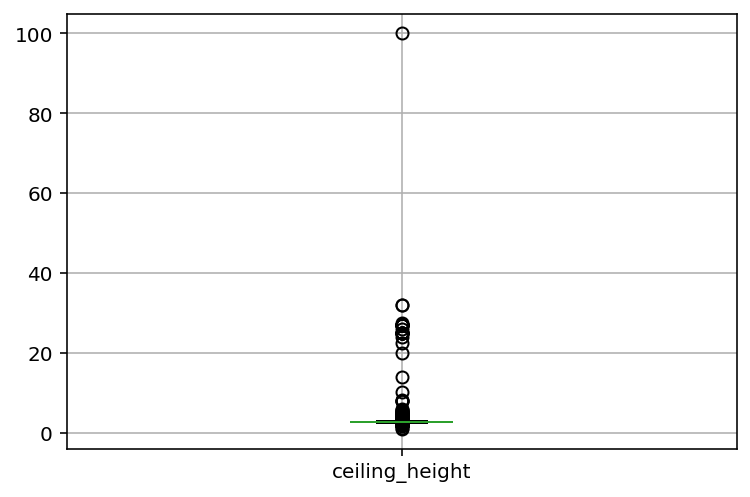

q1 - 1.5 * iqr = 2.4
q3 + 1.5 * iqr = 2.9

count    23650.0
mean         2.7
std          1.0
min          1.0
25%          2.6
50%          2.6
75%          2.7
max        100.0
Name: ceiling_height, dtype: float64


In [50]:
#напишем функцию которая построить гисторграммы, графики рассеивания, найдет границы выбросов и описательную статистику для столбцов 
# 'total_area', 'last_price', 'rooms', 'ceiling_height'
def hist(var):
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)
    iqr = q3 - q1
    x = q1 - 1.5 * iqr
    y = q3 + 1.5 * iqr
    data[var].plot(y=var, kind='hist', title = var, bins=50, range=(x,y), legend=True)
    plt.show()
    data.boxplot(var)
    plt.show()
    print('q1 - 1.5 * iqr =', x.round(1))
    print('q3 + 1.5 * iqr =', y.round(1))
    print()
    print(data[var].describe().round(1))
    return
 
hist('total_area')
hist('last_price')
hist('rooms')
hist('ceiling_height')

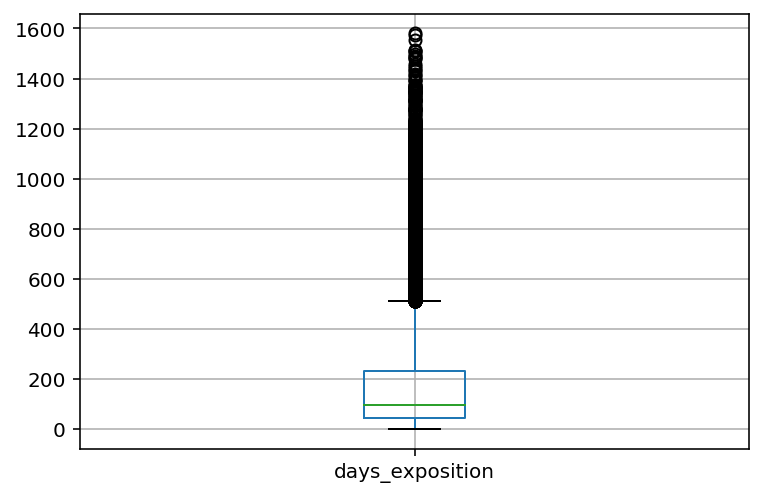

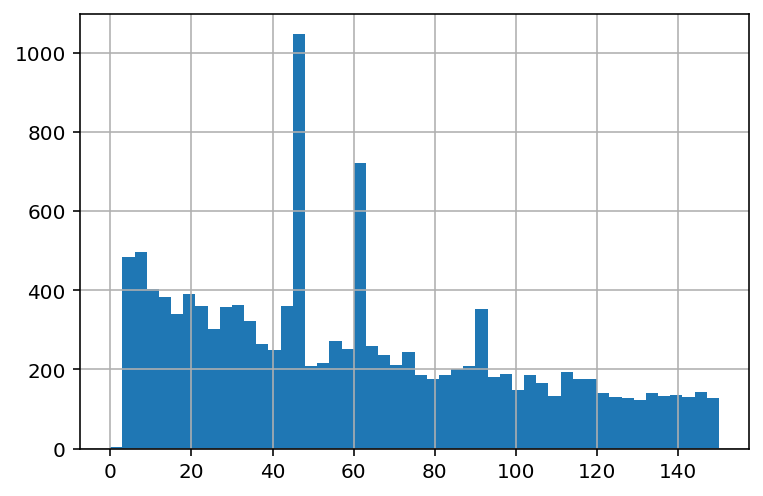

In [51]:
# изучим время продажи квартиры
data.boxplot(column='days_exposition')
plt.show()
data['days_exposition'].hist(bins=50, range=(0, 150))
plt.show()

In [52]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [53]:
q1 = data['days_exposition'].quantile(0.25)
q3 = data['days_exposition'].quantile(0.75)
iqr = q3 - q1 
print(q1 - 1.5 * iqr)
print(q3 + 1.5 * iqr)

-234.0
510.0


Были продажи всего за 1 день, самая долгая за 1580 дней.
Медианное значение - 180 дней, значит стандартная продажа проходит за 180 дней.
Быстрыми продажами можно посчитать те, что продаются наже 25 квантиля, т.е. быстрее 45 дней.
Все что находится выше 510 дней можно считать слишком долгими продажами, эти значения можно считать выбросами и избавиться от них.

In [54]:
#теперь вернемся к 'total_area', 'last_price', 'rooms', 'ceiling_height' и уберем выбросы
# у total_area min 12, max 900, mean 60, верхняя граница выбросов 114.2, поэтому удалим все значения выше 114.2
data_new = data.query('total_area <= 114.2') # сохраним эти значения в новом датафрейме
display(data_new['total_area'].describe()) #проверим

count    22406.000000
mean        54.325685
std         19.349559
min         12.000000
25%         39.400000
50%         50.100000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

In [55]:
# теперь last_price min 12190, max 763000000, mean 6541126, верхняя граница для выбросов 11897500, поэтому удалим все, что выше этого значения
data_new = data_new.query('last_price <= 11897500') # сохраним эти значения в новом датафрейме
display(data_new['last_price'].describe().round(1)) #проверим

count       21413.0
mean      4801468.8
std       2179808.4
min         12190.0
25%       3300000.0
50%       4400000.0
75%       5950000.0
max      11894400.0
Name: last_price, dtype: float64

In [56]:
# Теперь rooms min 0, max 19, mean 2, верхняя граница для выбросов 6, поэтому удалим все, что выше этого значения
data_new = data_new.query('rooms <= 6') # сохраним эти значения в новом датафрейме
display(data_new['rooms'].describe()) #проверим

count    21413.000000
mean         1.910942
std          0.888233
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [57]:
# и наконец ceiling_heigh min 1, max 100, mean 2.7, нижняя граница выбросов 2.4
# верхняя граница для выбросов 2.9, поэтому удалим все, что не входит в эти границы
data_new = data_new.query('ceiling_height >= 2.4 and ceiling_height <= 2.9') # сохраним эти значения в новом датафрейме
display(data_new['ceiling_height'].describe()) #проверим

count    19688.000000
mean         2.629782
std          0.084508
min          2.400000
25%          2.570000
50%          2.650000
75%          2.650000
max          2.900000
Name: ceiling_height, dtype: float64

Теперь будем смотреть какие факторы влияют на стоимость квартир.

In [58]:
data_new.head()

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,first_day_exposition,days_exposition,locality_name_new,price_m2,year,month,weekday,floor_category,living_area_ratio,kitchen_area_ratio
1,посёлок шушары,40.4,18.6,11.0,1,2,2.65,1,11,False,...,2018-12-04,81.0,шушары,82920.79,2018,12,1,первый,0.460396,0.272277
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5,False,...,2015-08-20,558.0,санкт-петербург,92785.71,2015,8,3,другой,0.612500,0.148214
5,городской посёлок янино-1,30.4,14.4,9.1,1,0,2.65,5,12,False,...,2018-09-10,55.0,янино-1,95065.79,2018,9,0,другой,0.473684,0.299342
6,посёлок парголово,37.3,10.6,14.4,1,1,2.65,6,26,False,...,2017-11-02,155.0,парголово,99195.71,2017,11,3,другой,0.284182,0.386059
7,санкт-петербург,71.6,30.5,18.9,2,2,2.65,22,24,False,...,2019-04-18,NaN,санкт-петербург,110544.69,2019,4,3,другой,0.425978,0.263966


In [59]:
# посмотрим корреляцию цены квадратного метра к общей площади, этажу, дню размещения, близости к центру и кол-ву комнат
corr = data_new[['price_m2',\
           'total_area',\
           'floor',\
           'days_exposition',\
           'city_centers_nearest',\
           'rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price_m2,total_area,floor,days_exposition,city_centers_nearest,rooms
price_m2,1,-0.098162,0.2773,-0.0299075,-0.187924,-0.250703
total_area,-0.098162,1,-0.00125966,0.0894287,-0.067399,0.802333
floor,0.2773,-0.00125966,1,-0.0305273,0.00367116,-0.165573
days_exposition,-0.0299075,0.0894287,-0.0305273,1,-0.0122946,0.0648073
city_centers_nearest,-0.187924,-0.067399,0.00367116,-0.0122946,1,-0.0390101
rooms,-0.250703,0.802333,-0.165573,0.0648073,-0.0390101,1


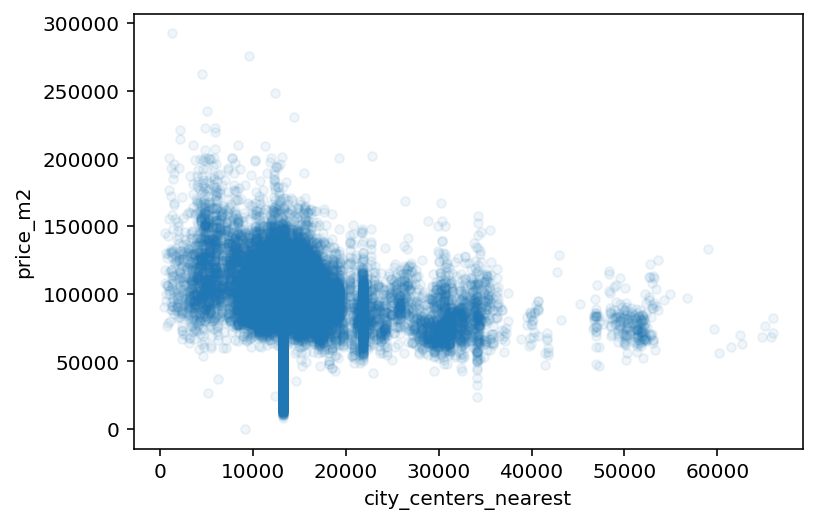

In [60]:
 # единственная явная зависимость здесь - это общая площадь к кол-ву комнат, но на стоимость квадратного метра ни один из этих показателей не влияет
 # на всякий случай посмотрим поподробнее в графиках
 # сначала посмотрим на удаленность от центра
data_new.plot(x='city_centers_nearest', y='price_m2', kind='scatter', alpha=0.07);
 # чем ближе к центру,тем больше разброс цен, удаляясь от центра этот разброс уменьшается, но и близко и далеко от центра есть квартиры с одинаковой ценой
 # за кв. метр. Полоса между 10000 и 20000 вероятнее всего результат заполнения пропусков медианой.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

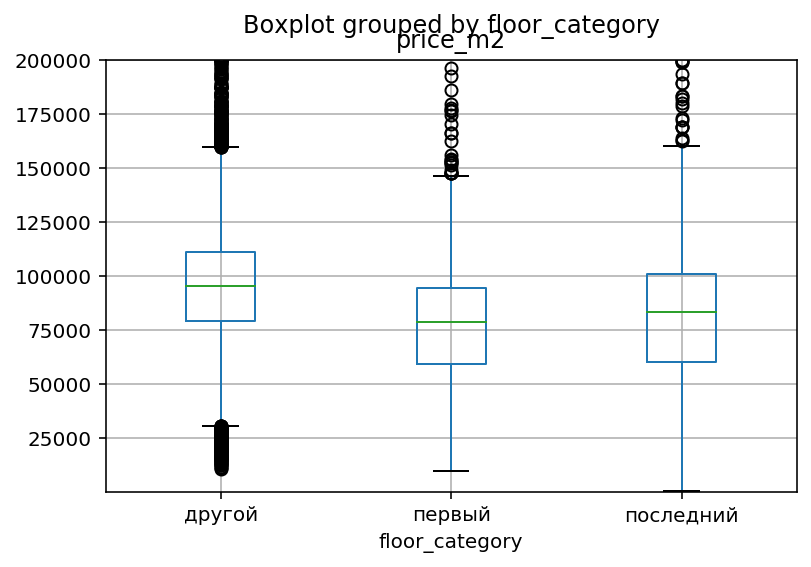

In [61]:
# теперь посмотрим на зависимость цены от этажа
data_new.boxplot(column='price_m2', by='floor_category')
plt.ylim(1, 200000)
#если смотреть по медиане, то первый и последний этаж имеют более низкую цену за кв.метр,
# другие этажы имеют более высокую цену, не знаю насколько эту разницу можно считать критичной.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

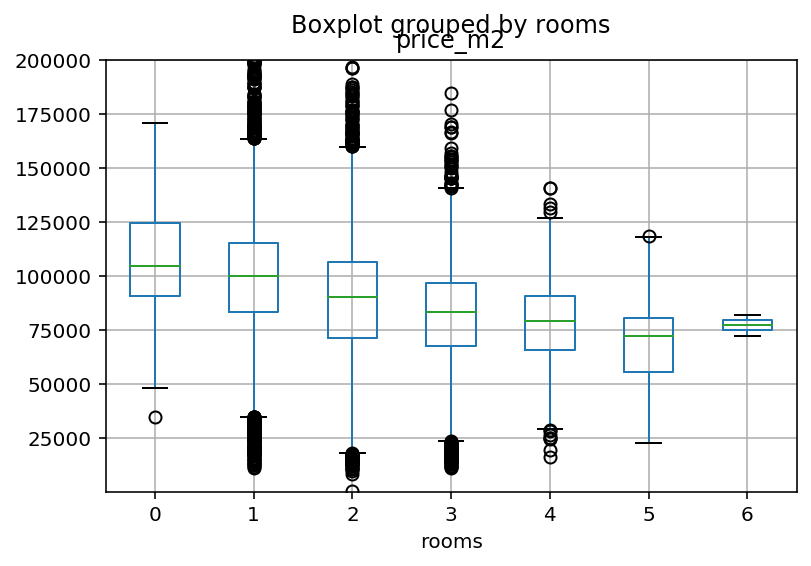

In [62]:
# теперь посмотрим на зависимость цены от кол-ва комнат
data_new.boxplot(column='price_m2', by='rooms')
plt.ylim(1, 200000)
# а вот здесь уже наблюдается тенденция, чем больше комнат, тем меньше стоимость кв.м.

Теперь посмотрим завистит ли цена кв. метра от времени размещения объявления.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

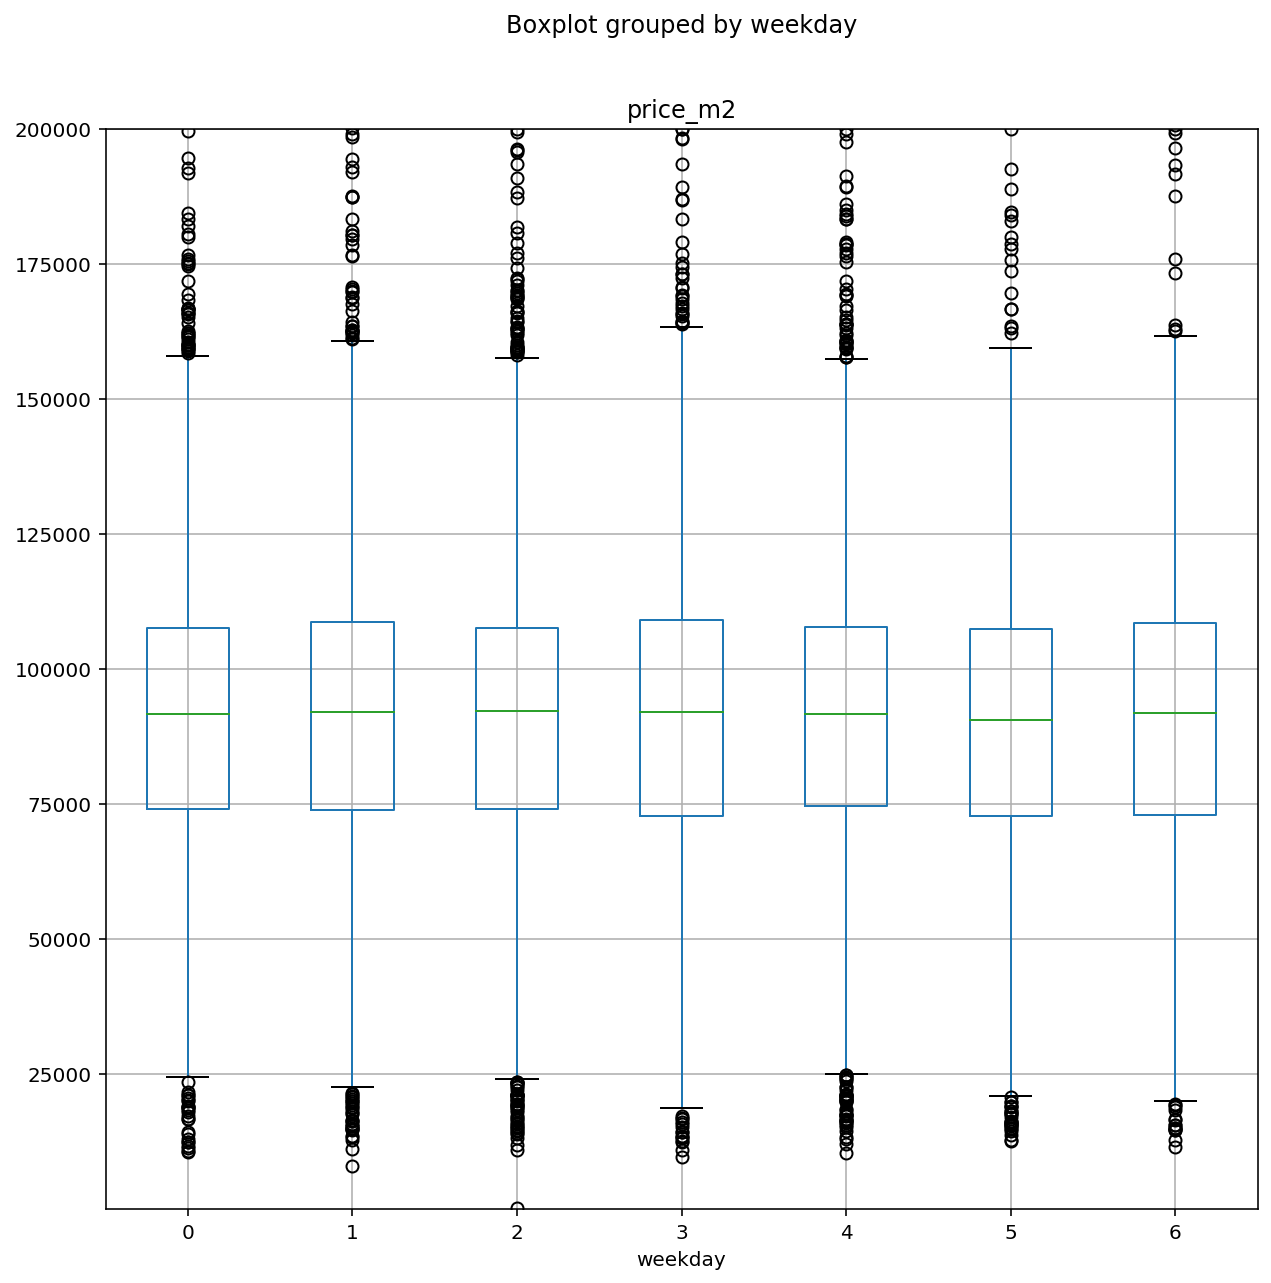

In [63]:
# сначала посмотрм на день недели
data_new.boxplot(column='price_m2', by='weekday', figsize=(10,10))
plt.ylim(1, 200000)
# Тут медиана почти на одном уровне, от дня недели размещения цена точно не зависит

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

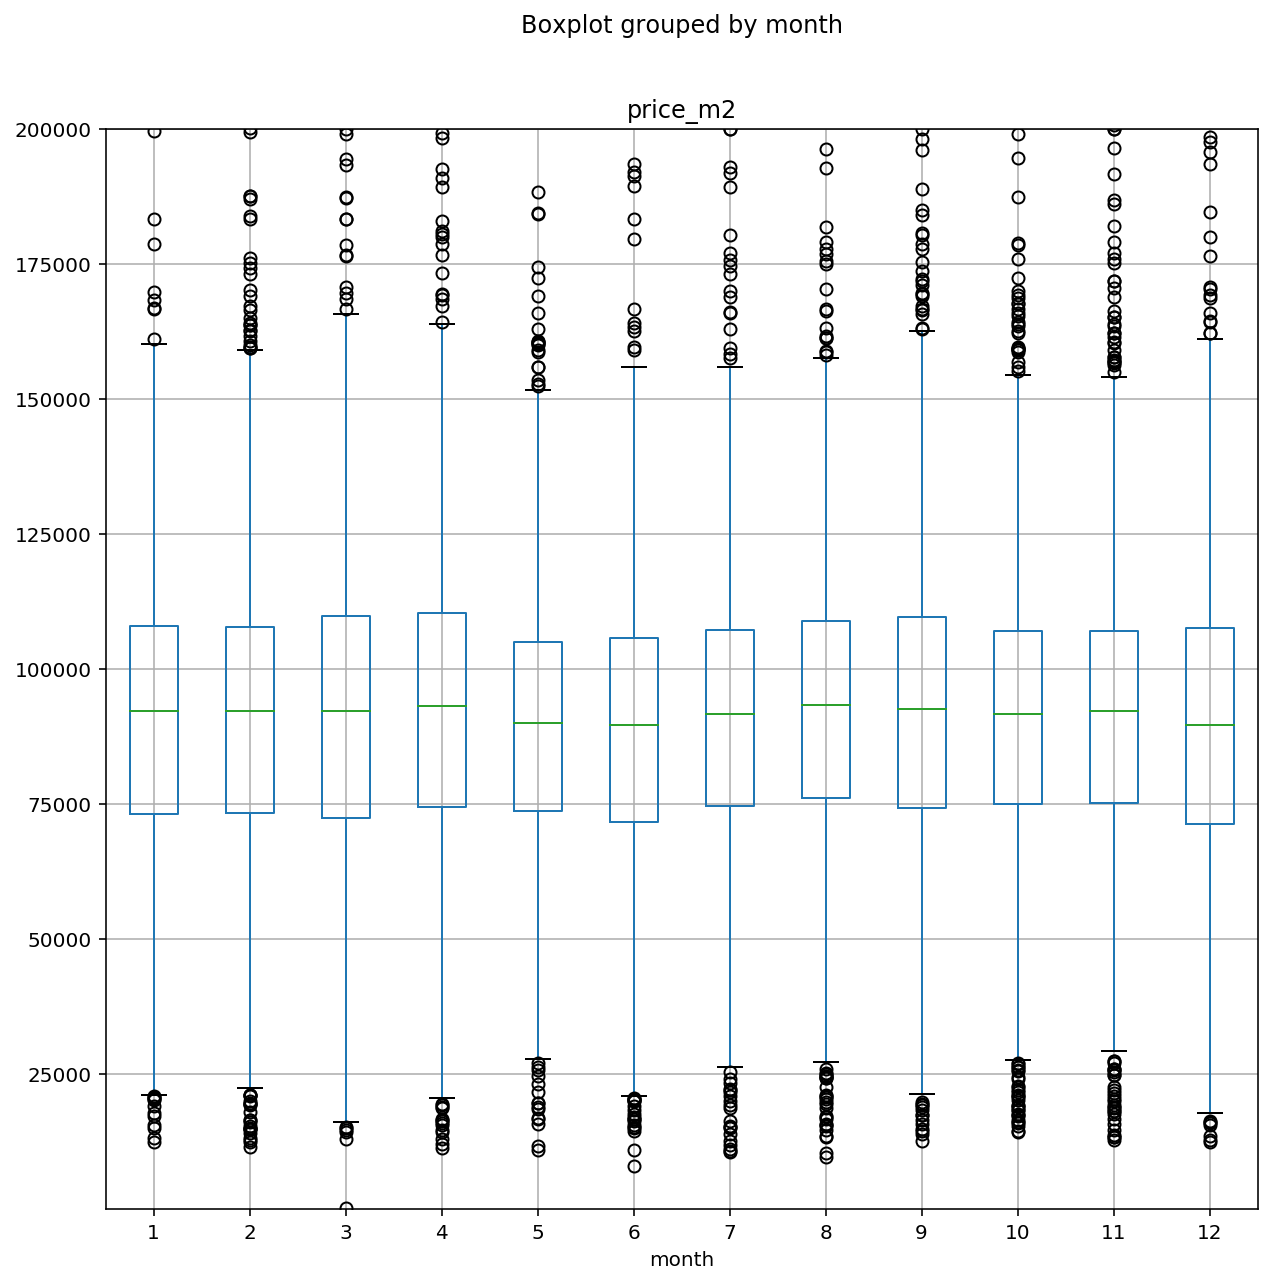

In [64]:
# Теперь  посмотрим на месяц
data_new.boxplot(column='price_m2', by='month', figsize=(10,10))
plt.ylim(1, 200000)
# здесь медиана тоже почти на одном уровне

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

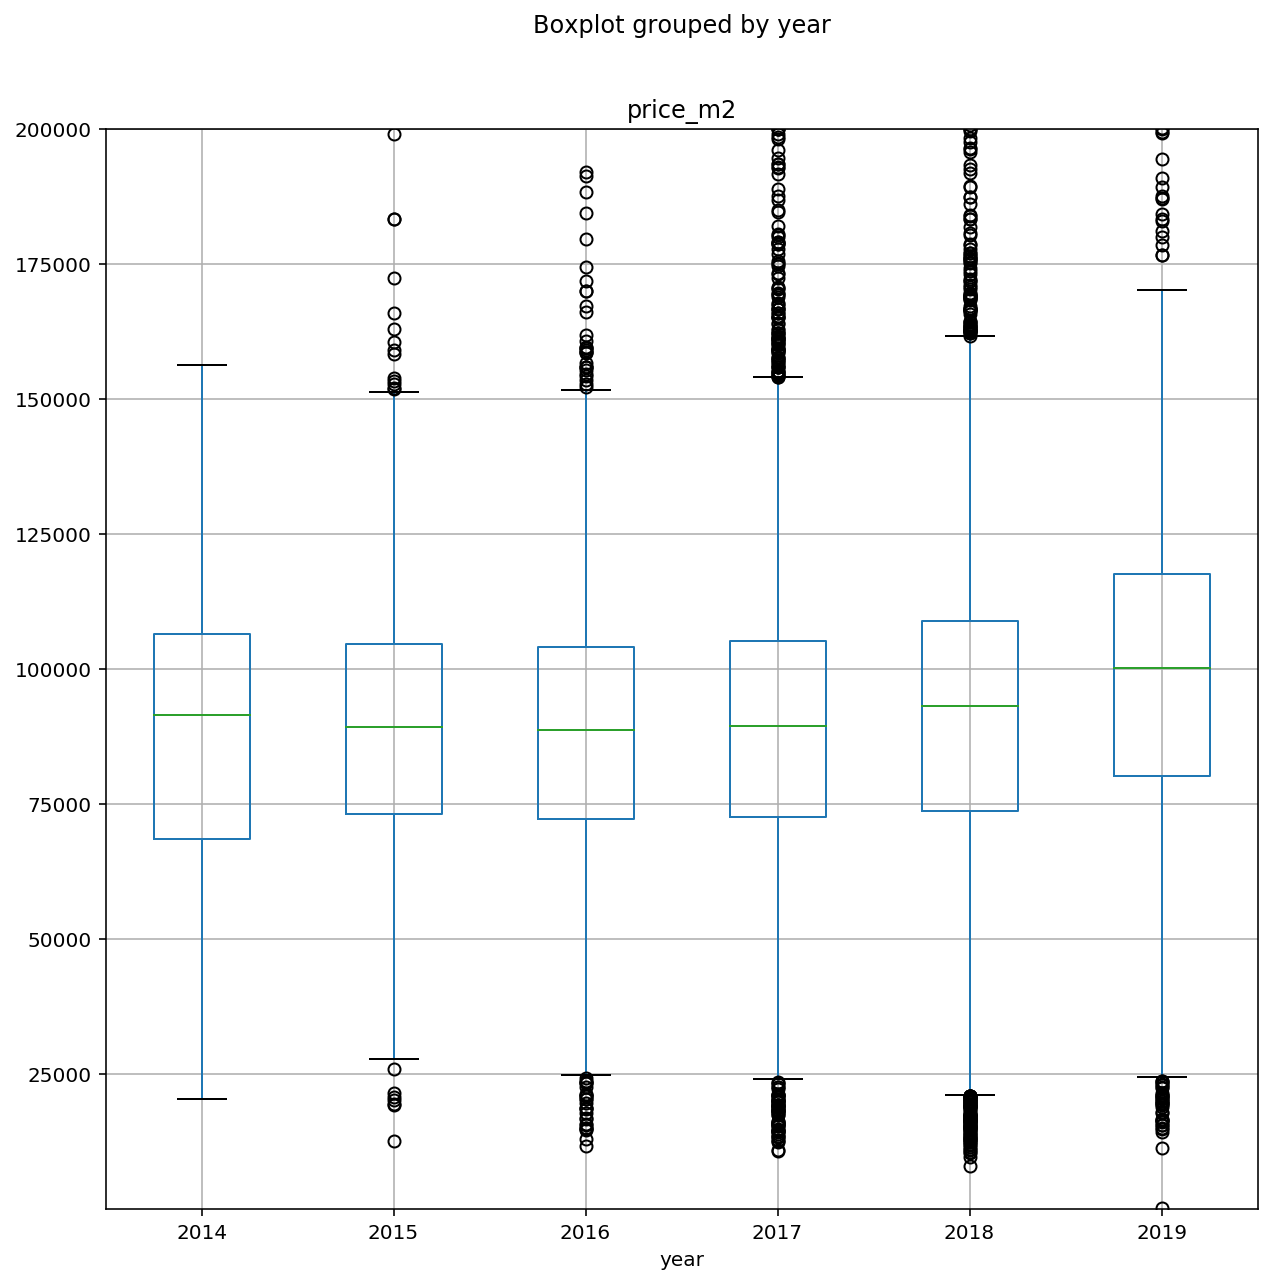

In [65]:
# теперь посмотрм на год
data_new.boxplot(column='price_m2', by='year', figsize=(10,10))
plt.ylim(1, 200000)
# с 14 по 17 года цена почти не менялась, а вот в 18 она пошла в рост и продолжила расти в 19

In [66]:
# Теперь найдем 10 населённых пунктов с наибольшим числом объявлений.
top_10 = data_new.groupby('locality_name_new').agg({'rooms':'count', 'price_m2': 'mean'}).sort_values(by='rooms', ascending=False).head(10)
top_10

,rooms,price_m2
locality_name_new,,
санкт-петербург,12195,104736.594798
мурино,549,85667.448980
шушары,435,78674.287471
всеволожск,382,66986.635288
парголово,326,90332.262638
колпино,317,75319.907098
пушкин,304,99760.043454
кудрово,297,92463.092391
гатчина,284,68374.764401


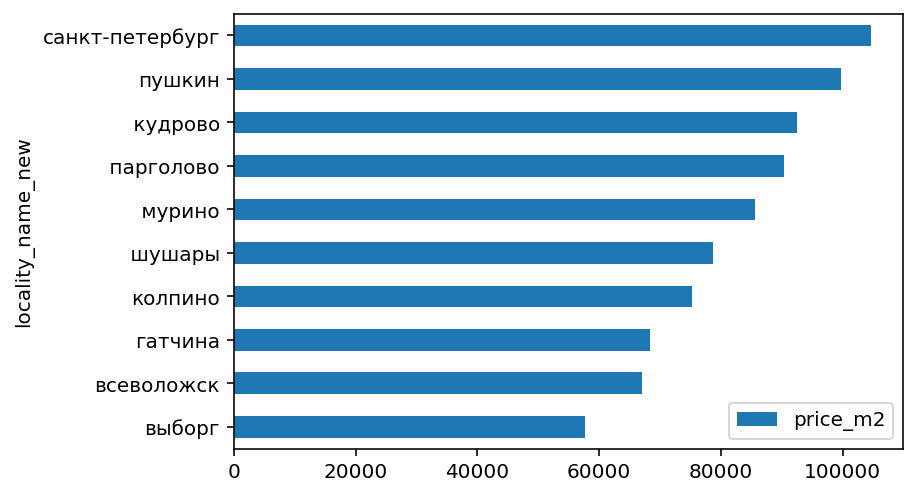

In [67]:
# Теперь найдем населённые пункты с самой высокой и низкой стоимостью жилья.
top_10.sort_values('price_m2', ascending=True).drop('rooms', axis=1).plot(kind='barh');
# Самая высокая стоимость жилья в Питере, а самая маленькая в Выборге.

Далее изучим предложение квартир в Санкт-Перербурге

In [68]:
# Создадим новый фрейм где locality_name_new = санкт-петербург
piter_flats = data_new.loc[data.loc[:,'locality_name_new']== 'санкт-петербург']
piter_flats.head(10)

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,first_day_exposition,days_exposition,locality_name_new,price_m2,year,month,weekday,floor_category,living_area_ratio,kitchen_area_ratio
2,санкт-петербург,56.0,34.3,8.3,2,0,2.65,4,5,False,...,2015-08-20,558.0,санкт-петербург,92785.71,2015,8,3,другой,0.612500,0.148214
7,санкт-петербург,71.6,30.5,18.9,2,2,2.65,22,24,False,...,2019-04-18,NaN,санкт-петербург,110544.69,2019,4,3,другой,0.425978,0.263966
9,санкт-петербург,61.0,43.6,6.5,3,2,2.50,7,9,False,...,2017-02-26,289.0,санкт-петербург,88524.59,2017,2,6,другой,0.714754,0.106557
10,санкт-петербург,39.6,20.3,8.5,1,0,2.67,3,12,False,...,2017-11-16,137.0,санкт-петербург,127525.25,2017,11,3,другой,0.512626,0.214646
15,санкт-петербург,39.0,20.5,7.6,1,1,2.65,5,14,False,...,2017-11-18,19.0,санкт-петербург,119230.77,2017,11,5,другой,0.525641,0.194872
17,санкт-петербург,36.0,16.5,11.0,1,1,2.65,7,17,False,...,2016-09-09,571.0,санкт-петербург,116111.11,2016,9,4,другой,0.458333,0.305556
18,санкт-петербург,31.0,19.4,5.6,1,1,2.50,2,5,False,...,2017-01-27,168.0,санкт-петербург,104838.71,2017,1,4,другой,0.625806,0.180645
21,санкт-петербург,31.6,16.9,5.7,1,1,2.65,2,5,False,...,2018-03-14,310.0,санкт-петербург,101265.82,2018,3,2,другой,0.534810,0.180380
23,санкт-петербург,32.0,17.7,6.1,1,0,2.60,9,9,False,...,2016-10-29,615.0,санкт-петербург,92187.50,2016,10,5,последний,0.553125,0.190625
24,санкт-петербург,97.2,46.5,19.6,2,0,2.65,1,3,False,...,2015-10-31,265.0,санкт-петербург,66872.43,2015,10,5,первый,0.478395,0.201646


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


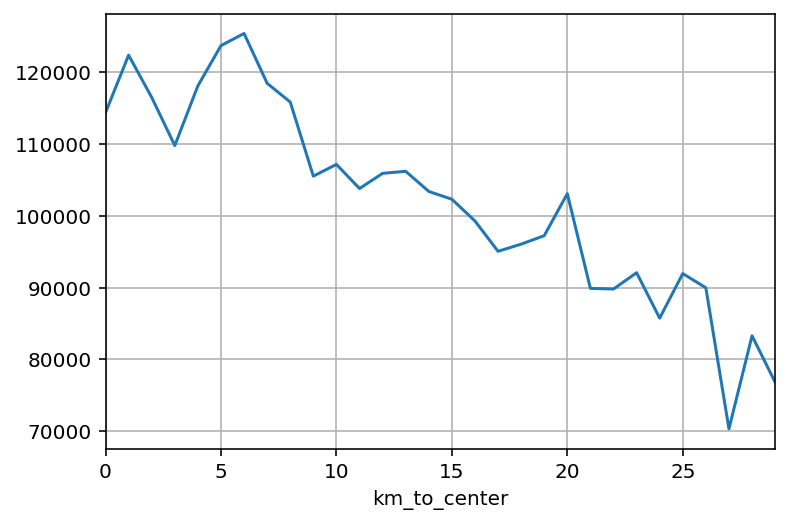

In [69]:
# Создадим новый столбец с растоянием до центра в киллометрах.
piter_flats['km_to_center'] = (piter_flats['city_centers_nearest'] / 1000).round().astype(int)
piter_flats.head()
piter_flats_grouped = piter_flats.groupby('km_to_center')['price_m2'].mean().astype(int)
piter_flats_grouped.plot(x='km_to_cente', y='price_m2', grid = True); #строим график зависимости цены за м2 от расстояния до центра

На графике четко видно, как после 6 км от центра цена за м2 резко начинает падать. Определим центральную границу 8 км, поскольку на 8км цена равняется с ценой на расстоянии 3 км, а потом снижается.


In [70]:
# ВЫделим квартиры в центре
city_centr = piter_flats.query('km_to_center <= 8')
city_centr.head() #проверим 

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floor,floors_total,studio,...,days_exposition,locality_name_new,price_m2,year,month,weekday,floor_category,living_area_ratio,kitchen_area_ratio,km_to_center
24,санкт-петербург,97.2,46.5,19.6,2,0,2.65,1,3,False,...,265.0,санкт-петербург,66872.43,2015,10,5,первый,0.478395,0.201646,2
61,санкт-петербург,74.0,43.0,20.0,2,0,2.65,4,4,False,...,609.0,санкт-петербург,107972.97,2017,8,3,последний,0.581081,0.270270,4
70,санкт-петербург,30.0,16.0,7.0,1,0,2.65,1,5,False,...,14.0,санкт-петербург,113333.33,2018,9,2,первый,0.533333,0.233333,8
94,санкт-петербург,29.5,15.6,5.5,1,1,2.50,2,5,False,...,4.0,санкт-петербург,118644.07,2019,4,4,другой,0.528814,0.186441,7
99,санкт-петербург,90.0,67.0,8.0,4,0,2.65,2,5,False,...,104.0,санкт-петербург,106666.67,2017,9,1,другой,0.744444,0.088889,3


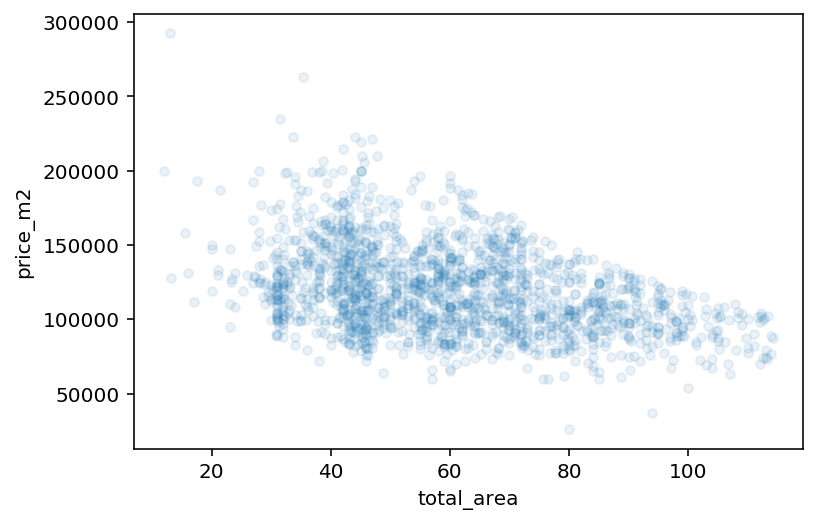

In [71]:
# Теперь изучим отдельно центр Питера
# Сначала посмотрим на общую площадь
city_centr.plot(x='total_area', y='price_m2', kind='scatter', alpha=0.09);
# чем больше площадь, тем меньше цена м2, это логично, ведь до этого мы смотрели график (правда по всей области)
# там чем больше комнат, тем меньше цена, с площадью это тоже логично

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


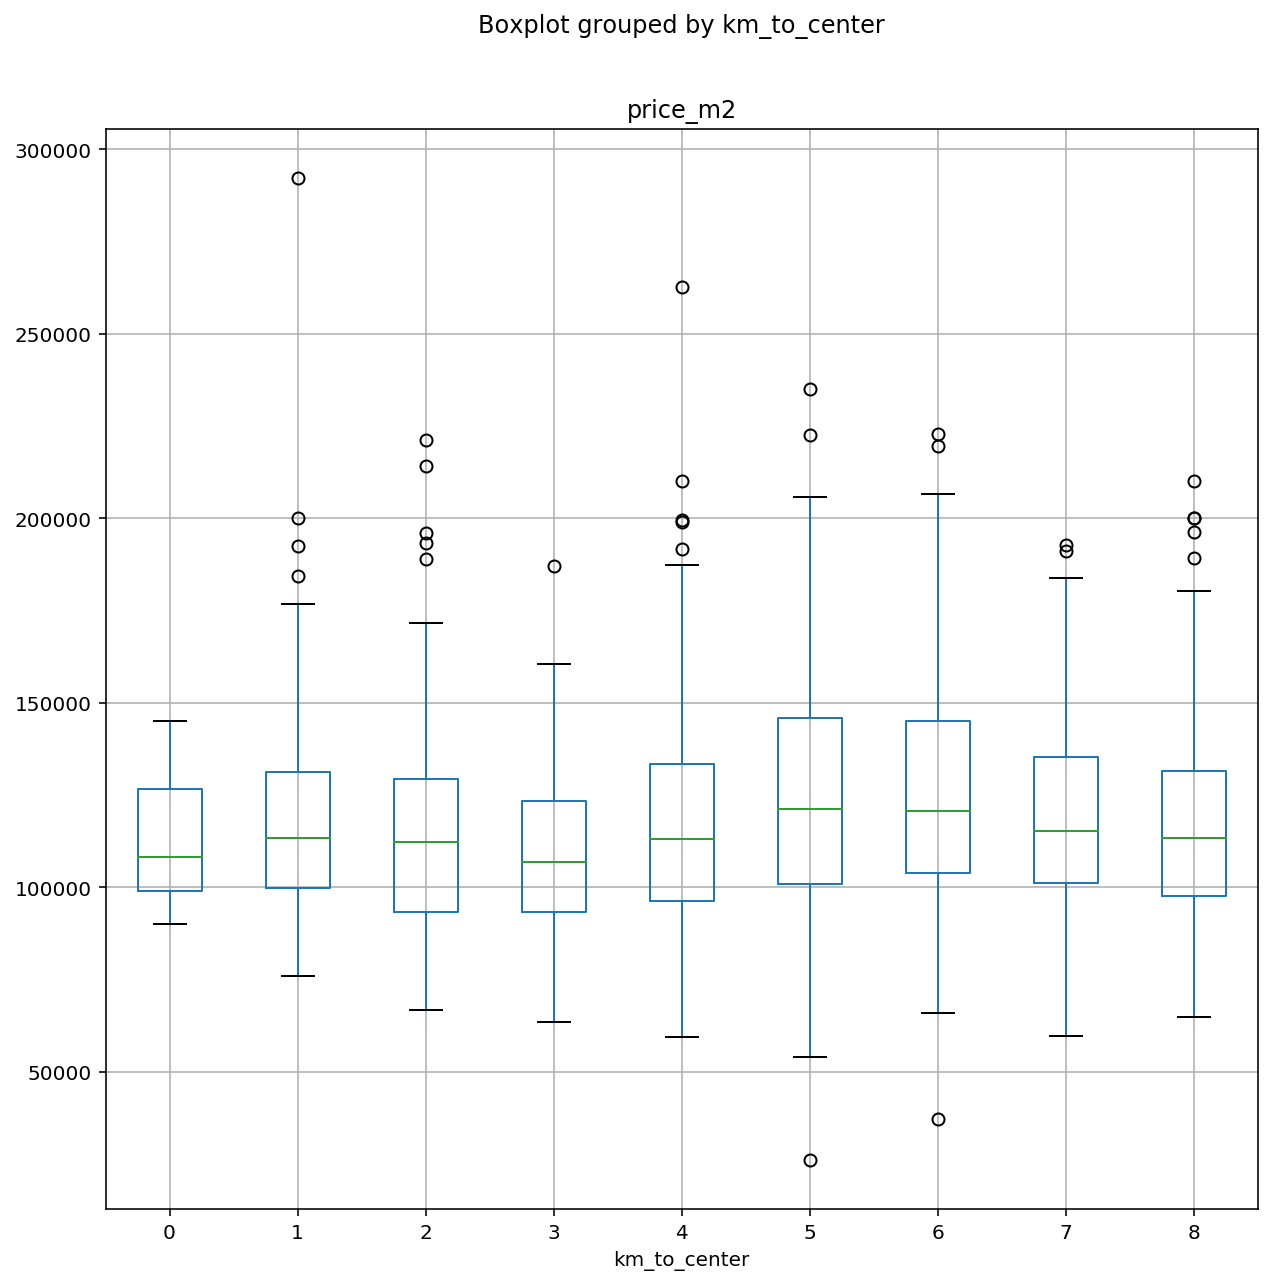

In [72]:
# теперь посмотрим на цену м2 в зависимости от удаленности от центра
city_centr.boxplot(column='price_m2', by='km_to_center', figsize=(10,10));
# тут цена почти на одно уровне, самые дорогие квартиры на расстоянии 5 - 6 км от центра

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


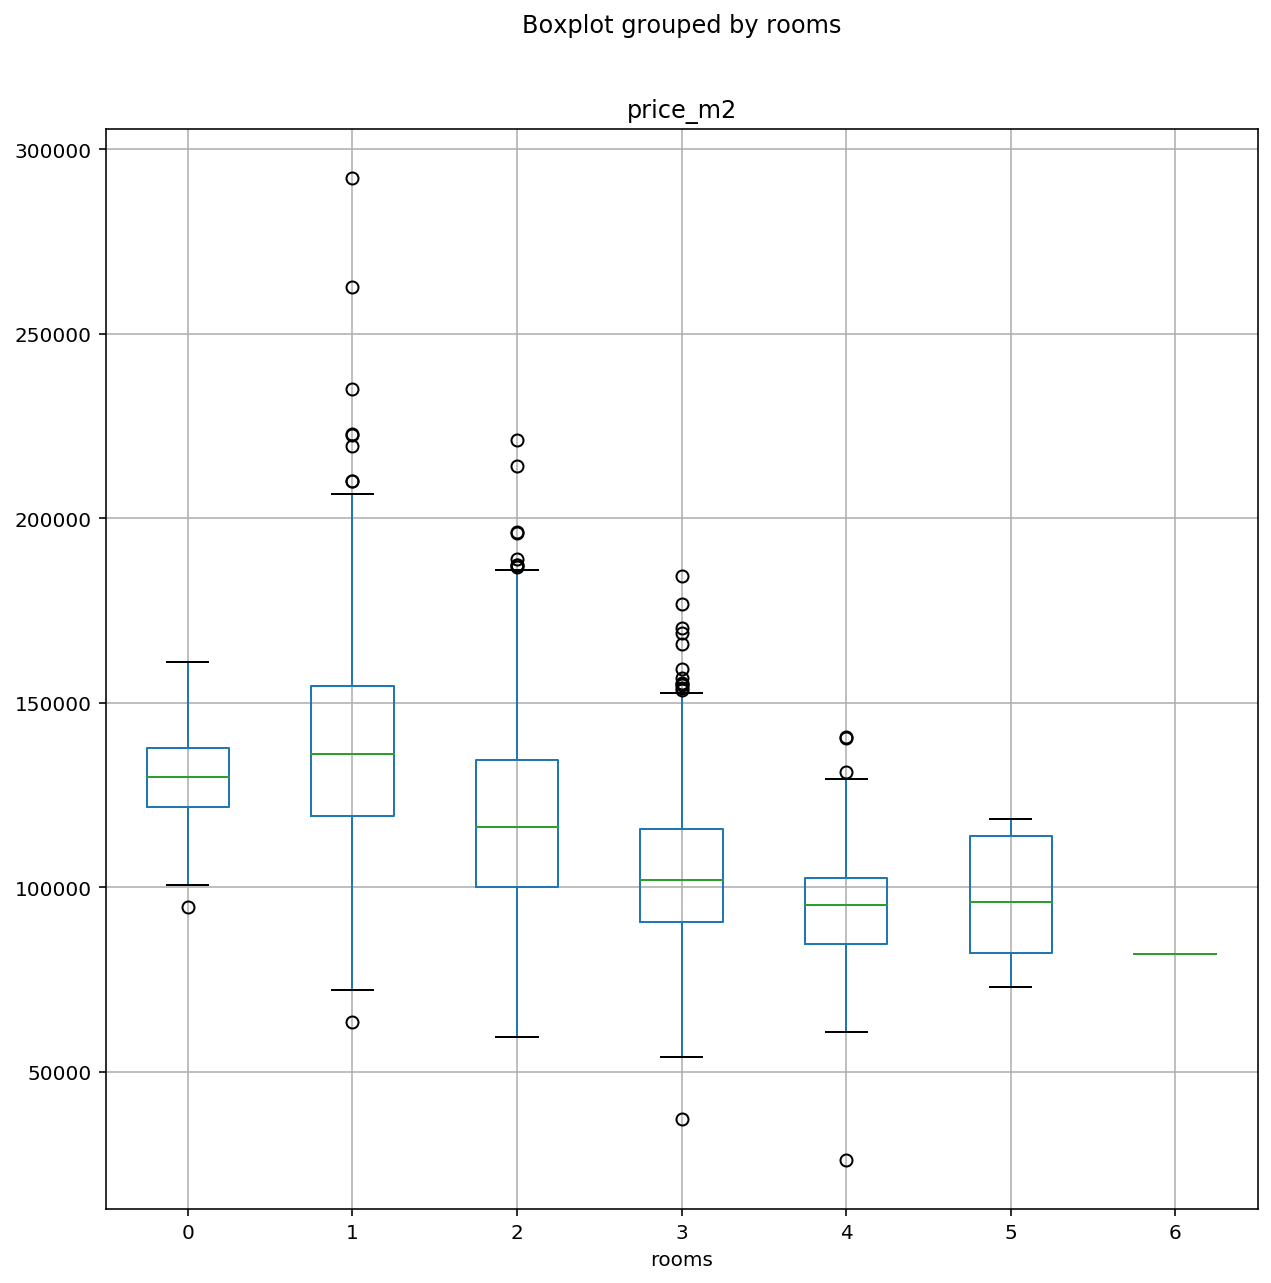

In [73]:
# Теперь на кол-во комнат глянем
city_centr.boxplot(column='price_m2', by='rooms', figsize=(10,10))
# тут так же с возрастанием числа комнат цена за м2 падает, другое цело, что цены больше посравнению с ЛО

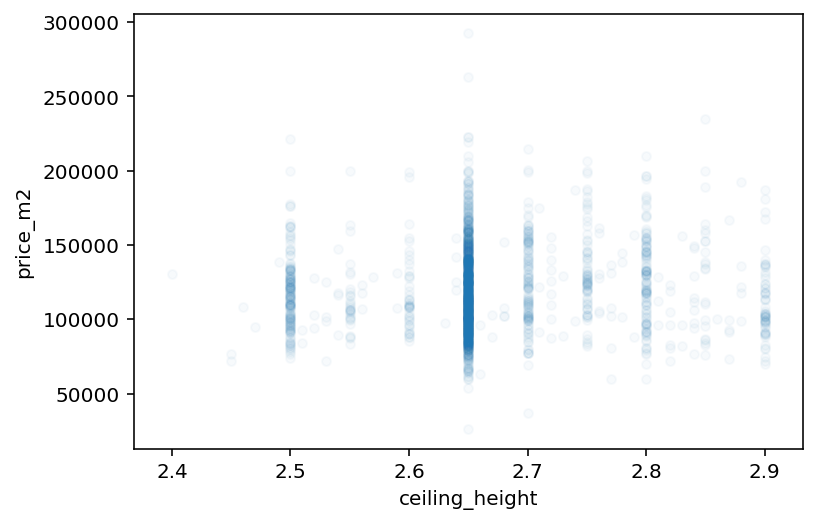

In [74]:
# Изучим высоту потолка
city_centr.plot(x='ceiling_height', y='price_m2', kind='scatter', alpha=0.03) 
# Самая распростаненная высота потолка 2,5м, но высота совсем не влияет на цену

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

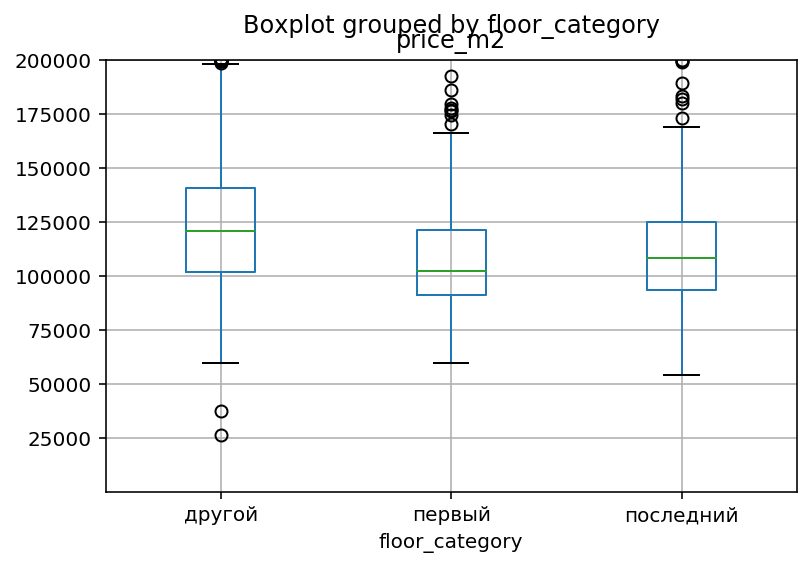

In [75]:
# Изучим этажи
city_centr.boxplot(column='price_m2', by='floor_category')
plt.ylim(1, 200000)
# В центре как и в ЛО не очень любят первый и последний этажи

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

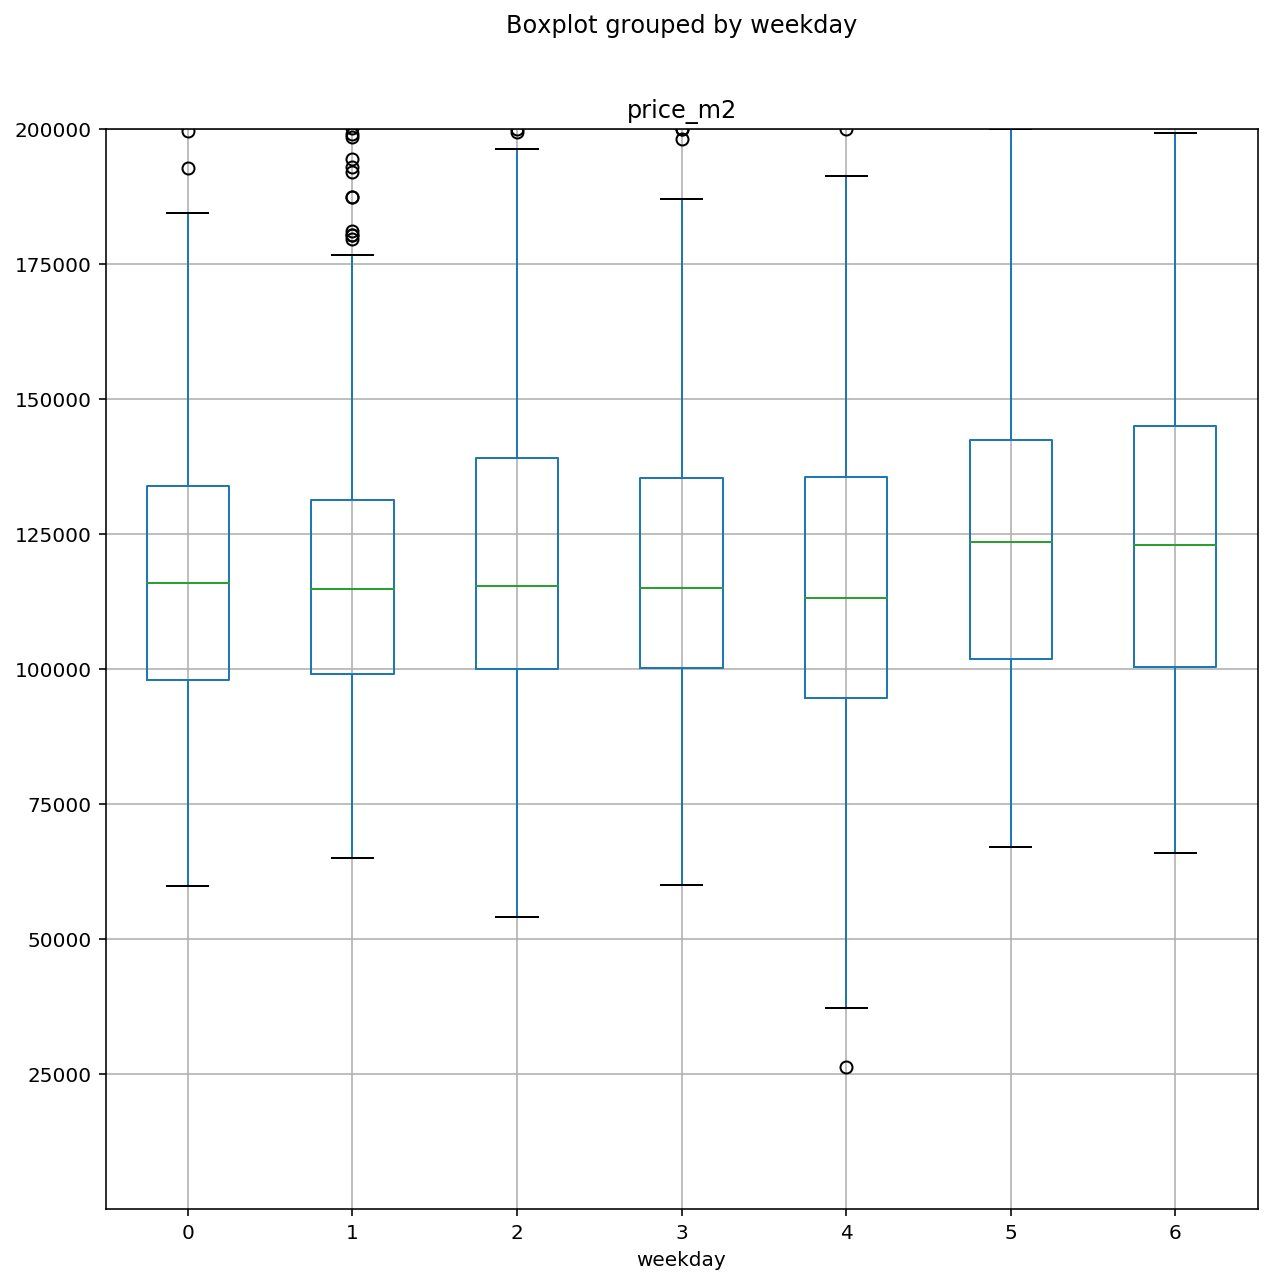

In [76]:
# Посмотрим на время размещения объявления, начнем с дня недели
city_centr.boxplot(column='price_m2', by='weekday', figsize=(10,10))
plt.ylim(1, 200000)
# А в центре объявления, размещенные в пятницу и субботу имеют более высокую цену за м2. Интересно, что их так вдохновляет? 


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

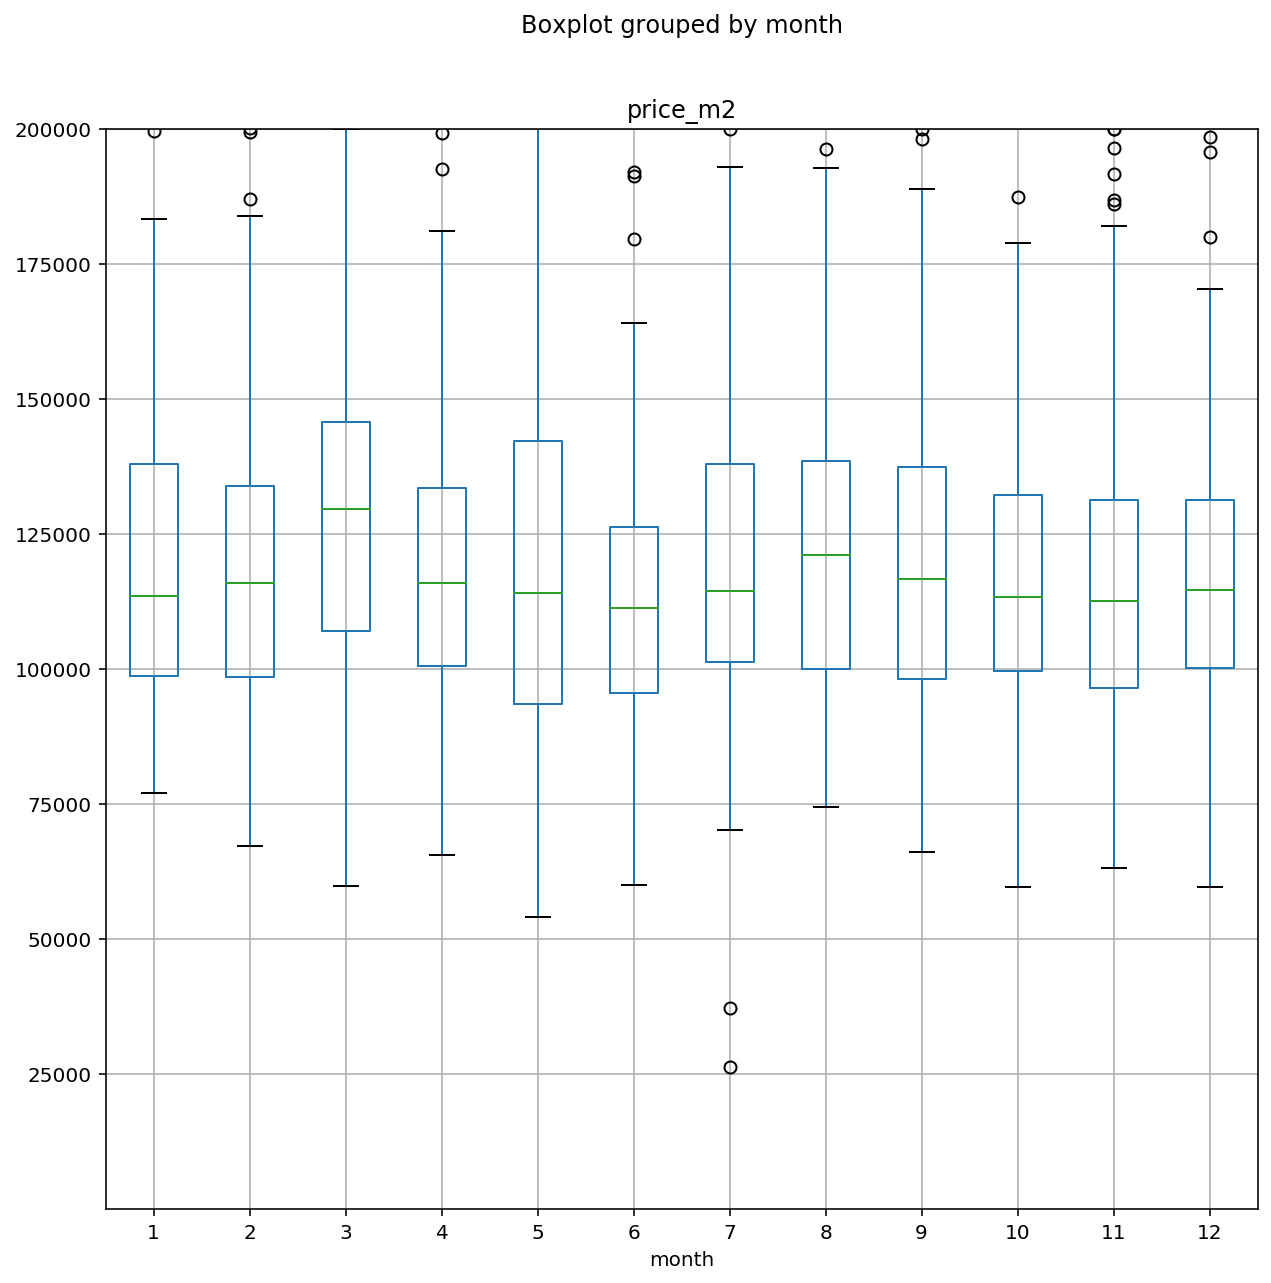

In [77]:
#ок, песни попели,теперь посмотрим на месяц размещения объявления
city_centr.boxplot(column='price_m2', by='month', figsize=(10,10))
plt.ylim(1, 200000)
# здесь все цены почти на одном уровне, но есть явный пик в марте

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 200000)

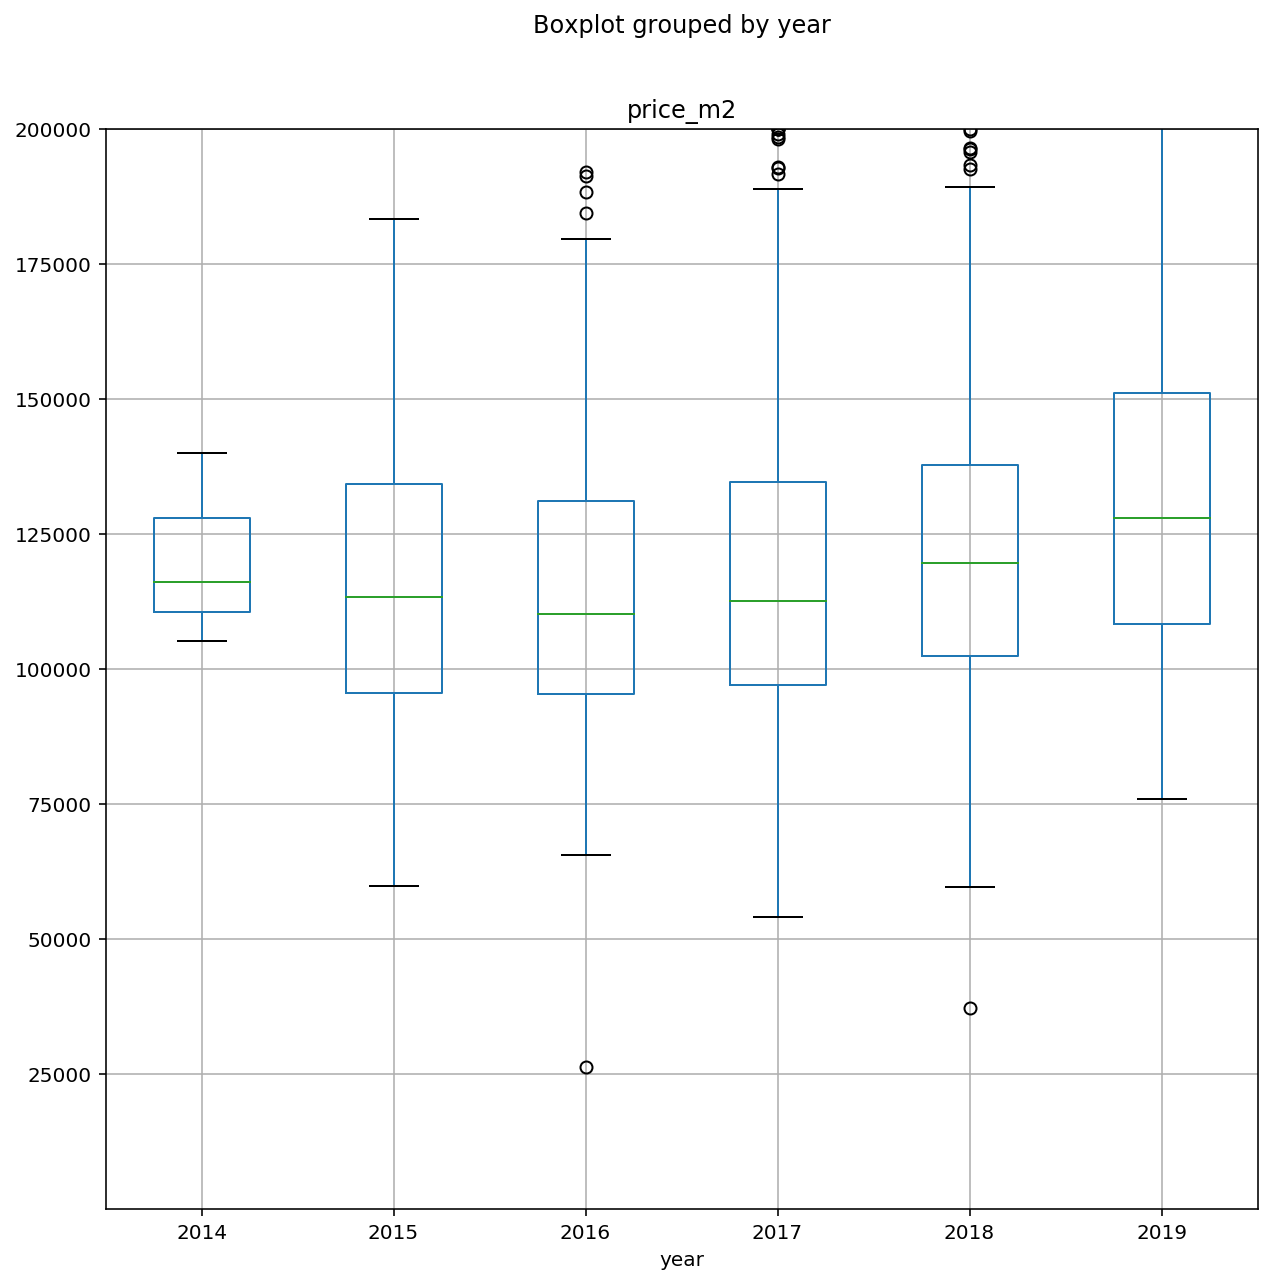

In [78]:
# теперь посморим на год размещения обявления
city_centr.boxplot(column='price_m2', by='year', figsize=(10,10))
plt.ylim(1, 200000)
# здесь, как и в ЛО, цена в 14-17годах была на одном уровне,а в 18 пошла в рост

## Общий вывод

Ну что же начнем.
Есть факторы,которые влияют на цену квартиры и в Ленинградской области и в центре Санкт-Петербурга одинаково.
1. Это удаленность от центра. Чем дальше от центра, тем меньше цена. 
2. Общая площадь и кол-во комнат, чем они больше,тем меньше цена за м2.
3. Этаж: первый и последний этаж - не самые лучшие варианты.

Но на центр Питера влияет и время размещения объявления: а именно дни недели - пятница и суббота, и месяц -март, в это время заметен пусть и небольшой, но ощутимый скачок в цене вверх. (Видимо приподнятое настроение в это время - конец недели и начало весны сказывается на цене))
